# Proyecto 1 - Etapa 1

## 1. Entendimiento de los Datos

En esta primera etapa, realizamos el perfilamiento de los datos y el análisis de calidad. Este proceso incluye:

- Exploración inicial del dataset.
- Identificación de datos faltantes y duplicados.
- Clasificación de variables en categóricas y numéricas.
- Identificación de valores atípicos y su impacto en el análisis.
- Visualización de la distribución de los datos.
- Justificación de transformaciones necesarias antes del preprocesamiento.

### 1.1 Carga de Datos

Trabajamos con los archivos **fake_news_spanish.csv** (entrenamiento) y **fake_news_test.csv** (prueba). Aseguramos la correcta lectura y almacenamiento de los datos.



In [4]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Definir rutas de los archivos
train_path = "fake_news_spanish.csv"
test_path = "fake_news_test.csv"

# Cargar los datos originales sin modificar con optimizaciones
df_train_original = pd.read_csv(train_path, sep=";", encoding="utf-8", low_memory=False, dtype={'ID': str})
df_test_original = pd.read_csv(test_path, sep=";", encoding="utf-8", low_memory=False, dtype={'ID': str})

# Crear copias para trabajar
df_train = df_train_original.copy()
df_test = df_test_original.copy()

# Convertir 'Fecha' a formato datetime
df_train['Fecha'] = pd.to_datetime(df_train['Fecha'], errors='coerce')

# Exploración inicial
print("Dimensiones del dataset de entrenamiento:")
print(f"Filas: {df_train.shape[0]}, Columnas: {df_train.shape[1]}")

# Información general del dataset
df_train.info()




Dimensiones del dataset de entrenamiento:
Filas: 57063, Columnas: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57063 entries, 0 to 57062
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           57063 non-null  object        
 1   Label        57063 non-null  int64         
 2   Titulo       57047 non-null  object        
 3   Descripcion  57063 non-null  object        
 4   Fecha        21740 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.2+ MB


### 1.2 Exploración Inicial

Analizamos la estructura del dataset y verificamos información básica sobre las variables disponibles.

- Contamos el número de valores únicos por columna.
- Identificamos valores faltantes y registros duplicados.
- Clasificamos las variables en numéricas y categóricas.

Los resultados de este análisis nos ayudarán a definir las estrategias de preprocesamiento en la siguiente fase.


In [5]:
# Convertir 'Fecha' a formato datetime sin imputar valores nulos
df_train['Fecha'] = pd.to_datetime(df_train['Fecha'], errors='coerce')

# Contar valores únicos por columna
print("\nValores únicos por columna:")
print(df_train.nunique())

# Identificación de valores nulos
print("\nValores nulos por columna:")
print(df_train.isnull().sum())

# Identificación de registros duplicados considerando título y descripción
duplicados = df_train.duplicated(subset=['Titulo', 'Descripcion']).sum()
print(f"\nRegistros duplicados en 'Titulo' y 'Descripcion': {duplicados}")

# Clasificación de variables corregida
num_vars = df_train.select_dtypes(include=[np.number]).columns.tolist()
cat_vars = df_train.select_dtypes(include=["object"]).columns.tolist()

# Excluir 'ID' de categóricas porque no aporta información útil
if 'ID' in cat_vars:
    cat_vars.remove('ID')

print(f"\nVariables numéricas: {num_vars}")
print(f"Variables categóricas: {cat_vars}")



Valores únicos por columna:
ID                 1
Label              2
Titulo         51604
Descripcion    49638
Fecha            906
dtype: int64

Valores nulos por columna:
ID                 0
Label              0
Titulo            16
Descripcion        0
Fecha          35323
dtype: int64

Registros duplicados en 'Titulo' y 'Descripcion': 450

Variables numéricas: ['Label']
Variables categóricas: ['Titulo', 'Descripcion']


### 1.3 Estadísticas Descriptivas

Para comprender mejor la distribución de los datos, generamos estadísticas generales de las variables numéricas y categóricas.

### 1.4 Visualización de Datos

Para observar la distribución de la variable objetivo y la longitud de los títulos, generamos los siguientes gráficos:

1. **Distribución de la variable objetivo (noticias falsas vs. reales).**
2. **Histograma de la longitud de los títulos.**
3. **Detección de valores atípicos en la longitud de los títulos.**
4. **Nube de palabras en los títulos de noticias.**

Estas visualizaciones nos permitirán detectar posibles sesgos en los datos y definir estrategias de transformación.



Estadísticas descriptivas para variables numéricas:
              Label                          Fecha
count  57063.000000                          21740
mean       0.581077  2020-08-03 05:41:15.289788416
min        0.000000            2016-02-01 00:00:00
25%        0.000000            2019-04-04 18:00:00
50%        1.000000            2020-06-06 00:00:00
75%        1.000000            2021-12-04 00:00:00
max        1.000000            2024-12-11 00:00:00
std        0.493387                            NaN

Estadísticas descriptivas para variables categóricas:
           ID                                             Titulo  \
count   57063                                              57047   
unique      1                                              51604   
top        ID  Escándalo de corrupción salpica a líderes sind...   
freq    57063                                                  6   

                                              Descripcion  
count                           

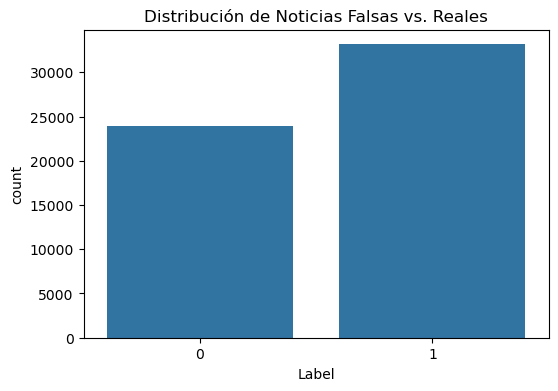

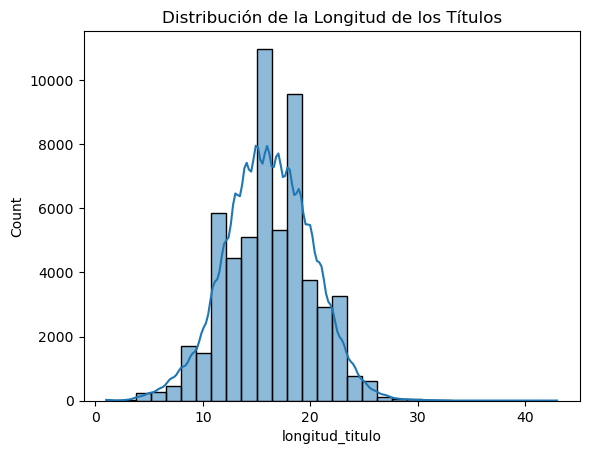

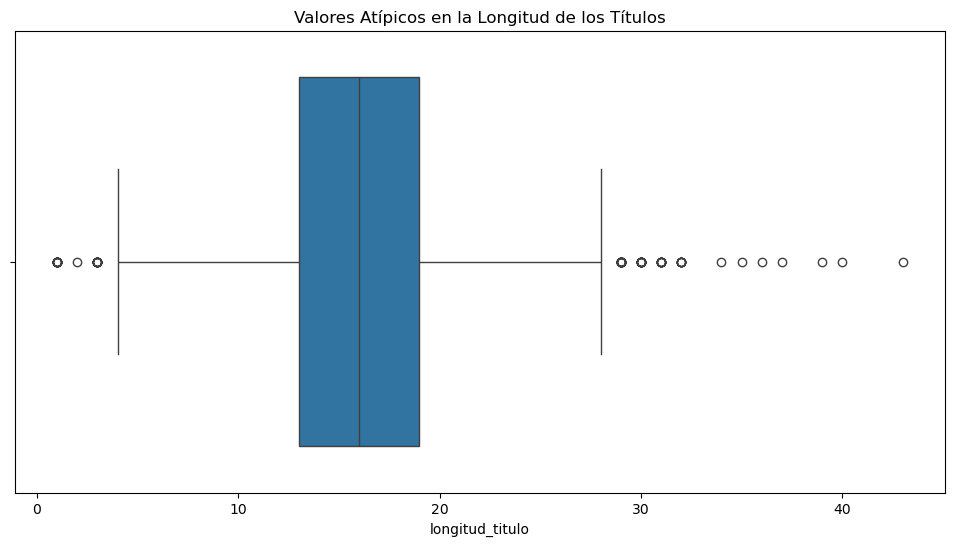

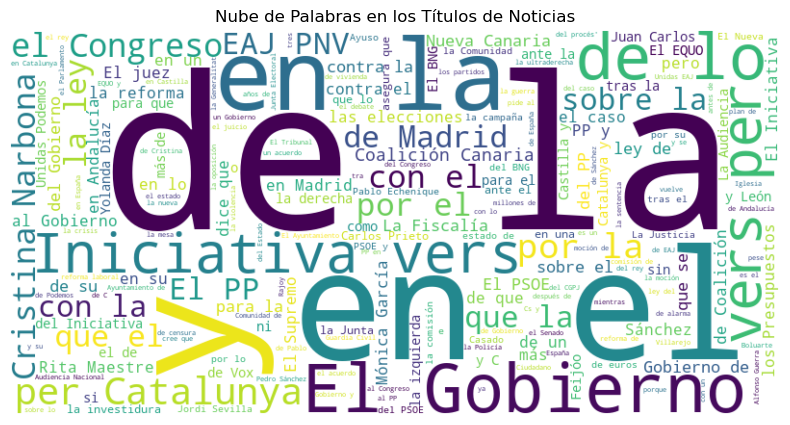

In [6]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas para variables numéricas:")
print(df_train.describe())

print("\nEstadísticas descriptivas para variables categóricas:")
print(df_train.describe(include=["O"]))

# Visualización de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(x="Label", data=df_train)
plt.title("Distribución de Noticias Falsas vs. Reales")
plt.show()

# Análisis de la longitud de los títulos
df_train["longitud_titulo"] = df_train["Titulo"].apply(lambda x: len(str(x).split()))
sns.histplot(df_train["longitud_titulo"], bins=30, kde=True)
plt.title("Distribución de la Longitud de los Títulos")
plt.show()

# Identificación de valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_train["longitud_titulo"])
plt.title("Valores Atípicos en la Longitud de los Títulos")
plt.show()

# WordCloud para analizar palabras más frecuentes en los títulos
text = " ".join(df_train["Titulo"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras en los Títulos de Noticias")
plt.show()


## 2. Preparación de los Datos

En esta sección, realizamos la preparación de los datos asegurando su calidad y consistencia antes de ser utilizados en el modelo. Siguiendo los principios de calidad de datos, nos enfocamos en:

- **Completitud**: Manejo de valores nulos y eliminación de registros irrelevantes.
- **Unicidad**: Eliminación de duplicados en títulos y descripciones.
- **Consistencia**: Transformación de texto a formato uniforme (minúsculas, sin caracteres especiales).
- **Validez**: Conversión de variables a su tipo adecuado.
- **Adecuación**: Procesamiento específico para análisis de texto.

A continuación, aplicamos estas transformaciones.

In [7]:
df_train = df_train.dropna(subset=['Titulo'])

df_train = df_train.drop_duplicates(subset=['Titulo', 'Descripcion'])

# Calcular porcentaje de reducción correctamente
reduction_percentage = (1 - df_train.shape[0] / df_train_original.shape[0]) * 100
print(f"Se han eliminado aproximadamente {reduction_percentage:.2f}% de los datos.")

Se han eliminado aproximadamente 0.82% de los datos.


### 2.1 Normalización del Texto

Dado que nuestro modelo se basará en análisis de texto, es crucial limpiar y normalizar los datos. Aplicamos:

1. **Conversión a minúsculas**: Para evitar distinciones innecesarias entre palabras con mayúsculas o minúsculas.
2. **Eliminación de caracteres especiales y puntuación**: Para reducir ruido en los datos.
3. **Eliminación de stopwords**: Para eliminar palabras irrelevantes en la clasificación.
4. **Lematización**: Para convertir palabras a su forma raíz, mejorando la representación del texto.

A continuación, implementamos estos pasos.


In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Descargar recursos necesarios
nltk.download('stopwords')
nltk.download('punkt')

# Inicializar stopwords y el stemmer en español
stop_words = set(stopwords.words('spanish'))
stemmer = SnowballStemmer("spanish")

def limpiar_texto(texto):
    """Aplica limpieza y normalización a un texto."""
    if isinstance(texto, str):  # Verificar que el texto no sea NaN
        texto = texto.lower().strip()  # Minúsculas y eliminar espacios extra
        texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
        texto = re.sub(r'\s+', ' ', texto)  # Reemplazar múltiples espacios por uno solo
        palabras = texto.split()
        palabras = [stemmer.stem(word) for word in palabras if word not in stop_words]  # Aplicar stemming y remover stopwords
        return ' '.join(palabras)
    return ""

# Asegurar que no haya valores nulos antes de aplicar la limpieza
df_train['Titulo'] = df_train['Titulo'].fillna("")
df_train['Descripcion'] = df_train['Descripcion'].fillna("")

# Aplicar la función de limpieza a las columnas relevantes
df_train['Titulo'] = df_train['Titulo'].apply(limpiar_texto)
df_train['Descripcion'] = df_train['Descripcion'].apply(limpiar_texto)

# Verificamos los resultados en algunas filas
print(df_train[['Titulo', 'Descripcion']].head(10))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bryan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                              Titulo  \
0  the guardi va sanchez europ necesit apuest de ...   
1  revel gobiern negoci liber mirel cambi otorg p...   
2  ahor nunc joan fust estatut valencian cumpl 40...   
3  iglesi alient yoland diaz erc eh bildu negoci ...   
4      puigdemont ningun tragedi repeticion eleccion   
5    pnv consol mayor pse salv papel pp sig marginal   
6  exconsejer nuri marin pid indult cas ere enriquec   
7  fiscal pid prision incondicional siet cdr terr...   
8    jos manuel perez torner creador television educ   
9  ayusiz bng santiag abascal instru segu estel p...   

                                         Descripcion  
0  diari britan public pas juev editorial proxim ...  
1  revel gobiern negoci liber mirel cambi otorg p...  
2  valencian convoc castell fiest grand conmemor ...  
3  polit igual negoci empresari negoci grup parla...  
4  entrev punt avui lid jxcat desdramatiz posibl ...  
5  nacional consig alcald bilba donosti vitori so... 

### 2.2 Vectorización de Texto

Dado que los modelos de machine learning requieren datos numéricos, transformamos los textos en representaciones vectoriales utilizando:

- **TF-IDF (Term Frequency - Inverse Document Frequency)**: Método que pondera la importancia de las palabras en el conjunto de datos.
- **CountVectorizer**: Cuenta la frecuencia de aparición de las palabras.

Aquí implementamos la vectorización.


In [13]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Descargar stopwords en español si no están disponibles
nltk.download('stopwords')
from nltk.corpus import stopwords

# Lista de stopwords en español
spanish_stopwords = stopwords.words('spanish')

# Definir parámetros de vectorización optimizados
vectorizer_titulo = TfidfVectorizer(
    max_features=7000,         # Aumentamos las características más representativas
    ngram_range=(1,2),         # Incluimos unigramas y bigramas
    stop_words=spanish_stopwords  # Eliminamos stopwords en español
)

vectorizer_descripcion = TfidfVectorizer(
    max_features=7000,
    ngram_range=(1,2),
    stop_words=spanish_stopwords
)

# Aplicar vectorización
X_titulo = vectorizer_titulo.fit_transform(df_train['Titulo'])
X_descripcion = vectorizer_descripcion.fit_transform(df_train['Descripcion'])

# Concatenar ambas representaciones en una sola matriz de características
X = hstack([X_titulo, X_descripcion])
y = df_train['Label']

# Verificar dimensiones después de la transformación
print(f"Dimensiones de la matriz de características: {X.shape}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dimensiones de la matriz de características: (56597, 14000)


### 2.3 División en Conjuntos de Entrenamiento y Prueba

Para evaluar el desempeño del modelo, dividimos los datos en conjuntos de entrenamiento y prueba. Usamos un 80% de los datos para entrenar y el 20% restante para evaluar.


In [16]:
from sklearn.model_selection import train_test_split
import numpy as np

# Asegurar que 'y' sea un array de numpy para evitar problemas en sklearn
y = np.array(y)  

# División en entrenamiento y prueba (80-20), manteniendo la distribución de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verificar distribución de clases usando np.unique() ya que y_train es un ndarray
print("Distribución en el conjunto de entrenamiento:")
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Clase {u}: {c} registros ({c / len(y_train) * 100:.2f}%)")

print("\nDistribución en el conjunto de prueba:")
unique, counts = np.unique(y_test, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Clase {u}: {c} registros ({c / len(y_test) * 100:.2f}%)")

# Verificar dimensiones después de la partición
print(f"\nDimensiones del conjunto de entrenamiento: {X_train.shape}")
print(f"Dimensiones del conjunto de prueba: {X_test.shape}")

# Mostrar las primeras filas del dataframe de entrenamiento
df_train.head()



Distribución en el conjunto de entrenamiento:
Clase 0: 19088 registros (42.16%)
Clase 1: 26189 registros (57.84%)

Distribución en el conjunto de prueba:
Clase 0: 4772 registros (42.16%)
Clase 1: 6548 registros (57.84%)

Dimensiones del conjunto de entrenamiento: (45277, 14000)
Dimensiones del conjunto de prueba: (11320, 14000)


,ID,Label,Titulo,Descripcion,Fecha,longitud_titulo
0,ID,1,the guardi va sanchez europ necesit apuest de ...,diari britan public pas juev editorial proxim ...,2023-02-06,13
1,ID,0,revel gobiern negoci liber mirel cambi otorg p...,revel gobiern negoci liber mirel cambi otorg p...,2023-01-10,18
2,ID,1,ahor nunc joan fust estatut valencian cumpl 40...,valencian convoc castell fiest grand conmemor ...,NaT,14
3,ID,1,iglesi alient yoland diaz erc eh bildu negoci ...,polit igual negoci empresari negoci grup parla...,2022-03-01,18
4,ID,0,puigdemont ningun tragedi repeticion eleccion,entrev punt avui lid jxcat desdramatiz posibl ...,2018-09-03,10


## Conclusión de la Preparación de Datos

Después de completar esta fase, obtenemos datos limpios, transformados y adecuados para el modelado. Los pasos clave incluyeron:

- Eliminación de valores nulos y duplicados.
- Normalización del texto (minúsculas, eliminación de caracteres especiales, lematización).
- Vectorización de texto mediante **TF-IDF**.
- División en conjuntos de **entrenamiento y prueba**.

Ahora estamos listos para construir y evaluar nuestro modelo de clasificación.
